In [91]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [88]:
import decimal
from decimal import Decimal
decimal.getcontext().prec = 3

In [8]:
path = "size_9_games/v1/2006/2006-features.csv"
data = np.loadtxt(path, skiprows=1, delimiter=',')

In [9]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
rows, cols = np.shape(data)
n_targets = 82
np.shape(data)

(72854, 323)

In [29]:

X = data[:,0:cols-n_targets]
y = data[:,cols-n_targets:]

In [30]:
np.shape(X)

(72854, 241)

In [31]:
np.shape(y)

(72854, 82)

In [42]:
X_traintest, X_cv, y_traintest, y_cv = train_test_split(X, y, test_size=0.2) #20% for cross validation
X_train, X_test, y_train, y_test = train_test_split(X_traintest, y_traintest, test_size=0.25) #60% for train and 20% for test because 0.8 * 0.25 = 0.2

In [43]:
np.shape(X_train)

(43712, 241)

In [44]:
np.shape(X_test)

(14571, 241)

In [94]:
clf = MLPClassifier(random_state=1,early_stopping=True).fit(X_train, y_train)

In [95]:
clf.score(X_test, y_test)

0.0

In [96]:
probs = clf.predict_proba(X_test)
test_rows, test_cols = np.shape(probs)

In [97]:
np.shape(probs)

(14571, 82)

In [114]:
top5 = 0
top3 = 0
top1 = 0
for i, row in enumerate(probs):
    # print(np.shape(row))
    
    ind = np.argpartition(row, -5)[-5:]
    y_target = np.argmax(y_test[i])
    
    if y_target == ind[-1]:
        top1 += 1
        top3 += 1
        top5 += 1
        continue
    # print(ind[2:])
    
    if y_target in ind[2:]:
        top3 += 1
        top5 += 1
        continue

    if y_target in ind[0:2]:
        top5 += 1
    
    # print(y_targ)
    # print(ind)
    
    # print(row)
    # print(maxes)
    # print(row[ind])
    # if i > 0: 
    #     break


In [117]:
def get_tops(probabilities,testset):
    top5 = 0
    top3 = 0
    top1 = 0
    for i, row in enumerate(probabilities):
        # print(i)
        
        ind = np.argpartition(row, -5)[-5:]
        # print(ind)
        y_target = np.argmax(testset[i])
        
        if y_target == ind[-1]:
            top1 += 1
            top3 += 1
            top5 += 1
            continue
        
        if y_target in ind[2:]:
            top3 += 1
            top5 += 1
            continue
    
        if y_target in ind[0:2]:
            top5 += 1
    # print(top5)
    return (top1, top3, top5)



(196, 565, 825)


In [118]:
print(f"top 5: {top5} {Decimal(top5)/Decimal(test_rows)}")
print(f"top 3: {top3} {Decimal(top3)/Decimal(test_rows)}")
print(f"top 1: {top1} {Decimal(top1)/Decimal(test_rows)}")
t1, t3, t5 = get_tops(probs, y_test)
print(f"top 5: {t5} {Decimal(t5)/Decimal(test_rows)}")
print(f"top 3: {t3} {Decimal(t3)/Decimal(test_rows)}")
print(f"top 1: {t1} {Decimal(t1)/Decimal(test_rows)}")

top 5: 825 0.0566
top 3: 565 0.0388
top 1: 196 0.0135
top 5: 825 0.0566
top 3: 565 0.0388
top 1: 196 0.0135


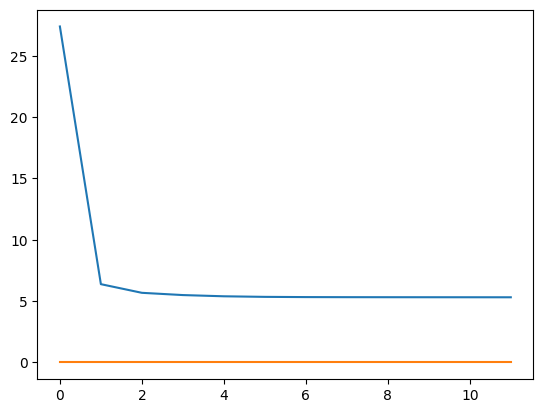

In [131]:
plt.plot(clf.loss_curve_)
plt.plot(clf.validation_scores_)

196
127
80
127
127
127
127


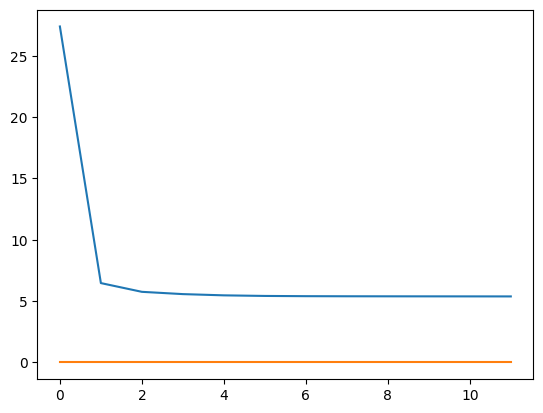

In [127]:
alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
cur_max_top_1 = 0
top_model = None
top_alpha = 0
for alpha in alphas:
    mlp = MLPClassifier(random_state=1,early_stopping=True, alpha=alpha).fit(X_train, y_train)
    probabilities = mlp.predict_proba(X_test)
    
    top1, top3, top5 = get_tops(probabilities, y_test)
    print(top1)
    
    if top1 > cur_max_top_1:
        cur_max_top_1 = top1
        top_model = mlp
        top_alpha = alpha
plt.plot(mlp.loss_curve_)
plt.plot(mlp.validation_scores_)      

In [134]:
probabilities = top_model.predict_proba(X_cv)    
print(get_tops(probabilities, y_cv))
print(top_alpha)



(238, 580, 851)
0.0001
